# Sales Prediction Analysis Part 4: Preparing for Streamlit

---

## Notebook Summary:

**Objective:** This notebook is part of the Sales Prediction Analysis project, focused on preparing a file structure and testing datasets and models for integration into a Streamlit application. The main goal is to ensure an organized file structure, facilitate easy access to datasets and models, and verify the functionality of these elements before their integration.

**Key Steps:**

### Preparing File Structure:
- **File Path Organization:** Establishment of an `FPATHS` dictionary to systematically organize and reference paths for data, models, and images.
- **Configuration Management:** Paths are stored in a JSON configuration file (`filepaths.json`), streamlining file path management and serving as a guide for file locations.
- **Directory Configuration:** Automated creation of necessary directories as specified by `FPATHS`, ensuring a well-organized file system for the application.

### Testing Filepaths:
- **Path Validation:** Utilizing the configuration file to check each path for correctness and accessibility, ensuring that all necessary files are correctly placed and accessible.

### Data Testing:
- **Data Integrity Checks:** Loading datasets from specified paths to verify data integrity and readiness for analysis within the Streamlit application.
- **Data Preview:** Displaying the dataset’s structure and a sample of its contents to ensure proper data preparation and suitability for further analysis.

### Image File Path Testing:
- **Visual Resource Verification:** Testing image file paths by embedding images in the notebook to confirm that visual assets are correctly linked and will display appropriately in the application.

### Model Testing:
- **Model Load and Performance Evaluation:** Loading models, particularly the XGBoost RandomizedSearchCV Tuned Model, and evaluating their performance. This includes testing the model on training and testing datasets to confirm their effectiveness.

### Utility Script Generation:
- **Dependencies Documentation:** Creating a `requirements.txt` file using `pipreqs`,which automates the documentation of all necessary Python packages. This process simplifies the management of package dependencies for any future changes or updates to the project environment.

**Outcome:** By the end of this notebook, a structured, tested, and functional framework is established, ready for the deployment of the Sales Prediction Analysis project in a Streamlit application. This setup ensures that the data, models, and images are well-organized and functionally sound, supporting effective decision-making in retail sales environments.

---

## Imports

In [2]:
# Standard library imports for environment setup
import os
import sys
import joblib, json
import pandas as pd
from pprint import pprint
from IPython.display import display, Markdown

# Local utilities/custom functions
sys.path.append(os.path.abspath("./"))
from custom_package import deploy, ml

# Configuration for automatic module reloading
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Preparing File Structure

In [3]:
# Prepare File Structure
root_directory = os.getcwd()
FPATHS = deploy.build_file_paths(root_directory)
# Correct paths
FPATHS = deploy.correct_paths(FPATHS)
pprint(FPATHS)

{'data': {'filtered': {'sales_predictions_2023_clean.csv': 'data/filtered/sales_predictions_2023_clean.csv',
                       'sales_predictions_2023_eda.csv': 'data/filtered/sales_predictions_2023_eda.csv',
                       'sales_predictions_2023_preprocessing.csv': 'data/filtered/sales_predictions_2023_preprocessing.csv'},
          'ml': {'X_test.joblib': 'data/ml/X_test.joblib',
                 'X_test_processed.joblib': 'data/ml/X_test_processed.joblib',
                 'X_train.joblib': 'data/ml/X_train.joblib',
                 'X_train_processed.joblib': 'data/ml/X_train_processed.joblib',
                 'feature_names.joblib': 'data/ml/feature_names.joblib',
                 'preprocessor.joblib': 'data/ml/preprocessor.joblib',
                 'y_test.joblib': 'data/ml/y_test.joblib',
                 'y_train.joblib': 'data/ml/y_train.joblib'},
          'raw': {'sales_predictions_2023.csv': 'data/raw/sales_predictions_2023.csv'}},
 'images': {'app': {'app_b

In [4]:
# Save filepaths 
os.makedirs('config/', exist_ok=True)
FPATHS_FILE = 'config/filepaths.json'
with open(FPATHS_FILE, 'w') as f:
    json.dump(FPATHS, f)

In [5]:
# Create directories
deploy.create_directories_from_paths(FPATHS)

## Testing Filepaths

In [6]:
# Load the filepaths
with open(FPATHS_FILE, 'r') as f:
    FPATHS = json.load(f)

# Test the filepaths
deploy.test_filepaths(FPATHS)

Path exists: data/filtered/sales_predictions_2023_clean.csv
Path exists: data/filtered/sales_predictions_2023_eda.csv
Path exists: data/filtered/sales_predictions_2023_preprocessing.csv
Path exists: data/ml/feature_names.joblib
Path exists: data/ml/preprocessor.joblib
Path exists: data/ml/X_test.joblib
Path exists: data/ml/X_test_processed.joblib
Path exists: data/ml/X_train.joblib
Path exists: data/ml/X_train_processed.joblib
Path exists: data/ml/y_test.joblib
Path exists: data/ml/y_train.joblib
Path exists: data/raw/sales_predictions_2023.csv
Path exists: models/ml/xgboost_rscv_tuned_model.joblib
Path exists: images/app/app_banner.png
Path exists: images/app/app_image.png
Path exists: images/eda/item_fat_content_distribution.png
Path exists: images/eda/item_fat_content_vs_item_outlet_sales.png
Path exists: images/eda/item_mrp_distribution.png
Path exists: images/eda/item_mrp_vs_item_outlet_sales.png
Path exists: images/eda/item_mrp_vs_item_outlet_sales_correlation.png
Path exists: im

### Testing Data Filepath

In [7]:
# Define the filepath using dictionary structure 
df_fpath = FPATHS['data']['filtered']['sales_predictions_2023_preprocessing.csv']

# Load the dataframe from the file
df = pd.read_csv(df_fpath)

# Display 
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_weight                7060 non-null   float64
 1   item_fat_content           8523 non-null   object 
 2   item_visibility            8523 non-null   float64
 3   item_mrp                   8523 non-null   float64
 4   outlet_establishment_year  8523 non-null   int64  
 5   outlet_size                6113 non-null   object 
 6   outlet_location_type       8523 non-null   object 
 7   outlet_type                8523 non-null   object 
 8   item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 599.4+ KB


,item_weight,item_fat_content,item_visibility,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.30,Low Fat,0.016047,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228


### Testing Image Filepath

In [8]:
# Confirm image path works
Markdown(f"<img src='{FPATHS['images']['eda']['item_outlet_sales_distribution.png']}'>")

<img src='images/eda/item_outlet_sales_distribution.png'>

### Testing Machine Learning Model Filepath

In [9]:
# Load training and testing data 
X_train = deploy.load_Xy_data(FPATHS['data']['ml']['X_train.joblib'])
y_train = deploy.load_Xy_data(FPATHS['data']['ml']['y_train.joblib'])
X_test = deploy.load_Xy_data(FPATHS['data']['ml']['X_test.joblib'])
y_test = deploy.load_Xy_data(FPATHS['data']['ml']['y_test.joblib'])
preprocessor = deploy.load_Xy_data(FPATHS['data']['ml']['preprocessor.joblib'])
feature_names = deploy.load_Xy_data(FPATHS['data']['ml']['feature_names.joblib'])

# Load the best model (XGBoost RandomizedSearchCV Tuned Model)
best_model = joblib.load(FPATHS['models']['ml']['xgboost_rscv_tuned_model.joblib'])

2024-07-02 02:33:51.502 
  command:

    streamlit run C:\ProgramData\anaconda3\envs\dojo-env\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-07-02 02:33:51.518 No runtime found, using MemoryCacheStorageManager


,MAE,MSE,RMSE,R^2
XGBoost RandomizedSearchCV Tuned Model Training Data,726.368,1054874.620,1027.071,0.644
XGBoost RandomizedSearchCV Tuned Model Test Data,731.067,1105397.853,1051.379,0.599


,Training Data,- % -,Test Data,- % -
Mean Absolute Error,726.3680,54.8786,731.0671,59.5921
Median Absolute Error,480.7048,29.5949,489.5973,30.6858
Standard Deviation of Absolute Errors,726.1296,82.6707,755.6049,90.0134
Min Absolute Error,0.0393,0.0015,0.6158,0.0221
Max Absolute Error,5932.4597,750.8568,5725.3661,800.9090


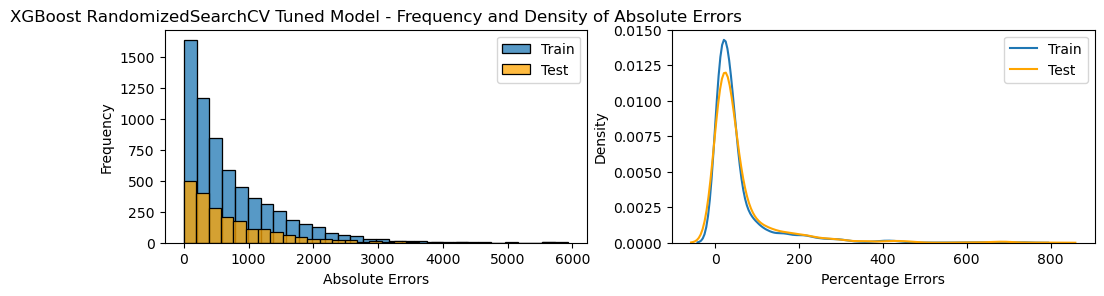

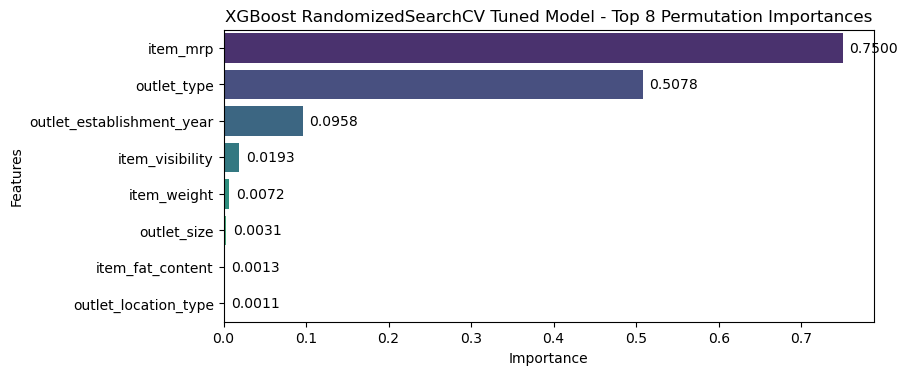

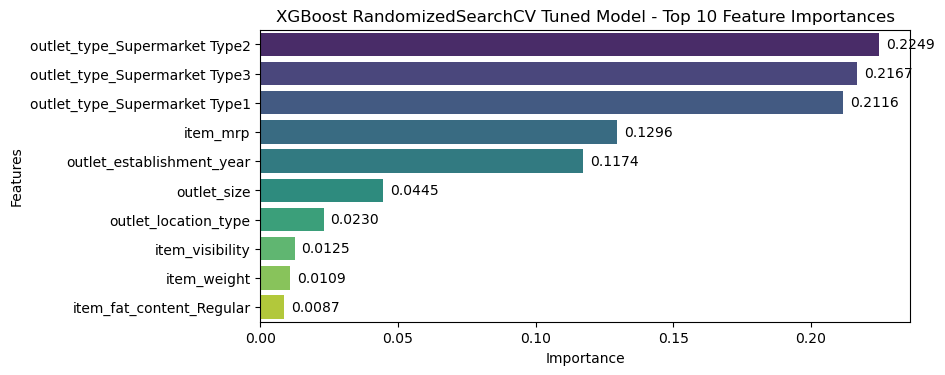

Feature,Importance
outlet_type_Supermarket Type2,0.224914
outlet_type_Supermarket Type3,0.216732
outlet_type_Supermarket Type1,0.211647
item_mrp,0.129642
outlet_establishment_year,0.117415
outlet_size,0.044509
outlet_location_type,0.023024
item_visibility,0.012486
item_weight,0.010922
item_fat_content_Regular,0.008710


In [10]:
# Evaluate best model
ml.single_model_evaluation(
    model=best_model,     
    preprocessor=preprocessor,
    X_train=X_train,      
    y_train=y_train,
    X_test=X_test,         
    y_test=y_test,
    features_imp=True,     
    perms=True,            
    metric_decimals=3,
    perm_decimals=4,
    feature_imp_decimals=4,
    error_decimals=4,
    model_name='XGBoost RandomizedSearchCV Tuned Model'
)

## Generating the pipreqs package

In [10]:
!pipreqs .